In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = pd.read_excel('../data/raw/Features Dataset.xlsx')

In [4]:
df.shape

(30529, 24)

In [5]:
df.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.486485,0.352808,0.209923,0.154472,0.049567,0.427420,0.397009,0.968446,0.111746,0.735501,...,0.122540,0.113016,0.057069,0.073750,0.026078,0.007838,0.144591,0.764190,0.058232,1
1,0.526241,0.617741,0.226264,0.163227,0.046720,0.527130,0.092359,0.968781,0.130159,0.494728,...,0.130159,0.130159,0.063762,0.066182,0.0308577,0.008220,0.151411,0.523930,0.066146,1
2,0.275985,0.749712,0.162079,0.267667,0.021195,0.225698,0.808977,0.977174,0.236825,0.869947,...,0.240000,0.239365,0.073771,0.062334,0.047485,0.009091,0.256178,0.903579,0.037868,1
3,0.410623,0.828166,0.186422,0.289556,0.024251,0.377933,0.913243,0.975159,0.260952,0.464851,...,0.262222,0.260952,0.080485,0.056312,0.0522724,0.007637,0.279966,0.496005,0.047706,1
4,0.496481,0.728570,0.318669,0.481551,0.088410,0.407450,0.431428,0.952669,0.385397,0.487698,...,0.389206,0.388571,0.103155,0.088595,0.0324742,0.015847,0.444159,0.519704,0.120092,1


In [6]:
df.tail()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
30524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
30525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
30526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
30527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
30528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30529 entries, 0 to 30528
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         6366 non-null   float64
 1   Eccentricity     6366 non-null   float64
 2   EquivDiameter    6366 non-null   float64
 3   Extrema          6366 non-null   float64
 4   FilledArea       6366 non-null   float64
 5   Extent           6366 non-null   float64
 6   Orientation      6366 non-null   float64
 7   EulerNumber      6366 non-null   float64
 8   BoundingBox1     6366 non-null   float64
 9   BoundingBox2     6366 non-null   float64
 10  BoundingBox3     6366 non-null   float64
 11  BoundingBox4     6366 non-null   float64
 12  ConvexHull1      6366 non-null   float64
 13  ConvexHull2      6366 non-null   float64
 14  ConvexHull3      6366 non-null   float64
 15  ConvexHull4      6366 non-null   float64
 16  MajorAxisLength  6366 non-null   float64
 17  MinorAxisLen

<AxesSubplot:>

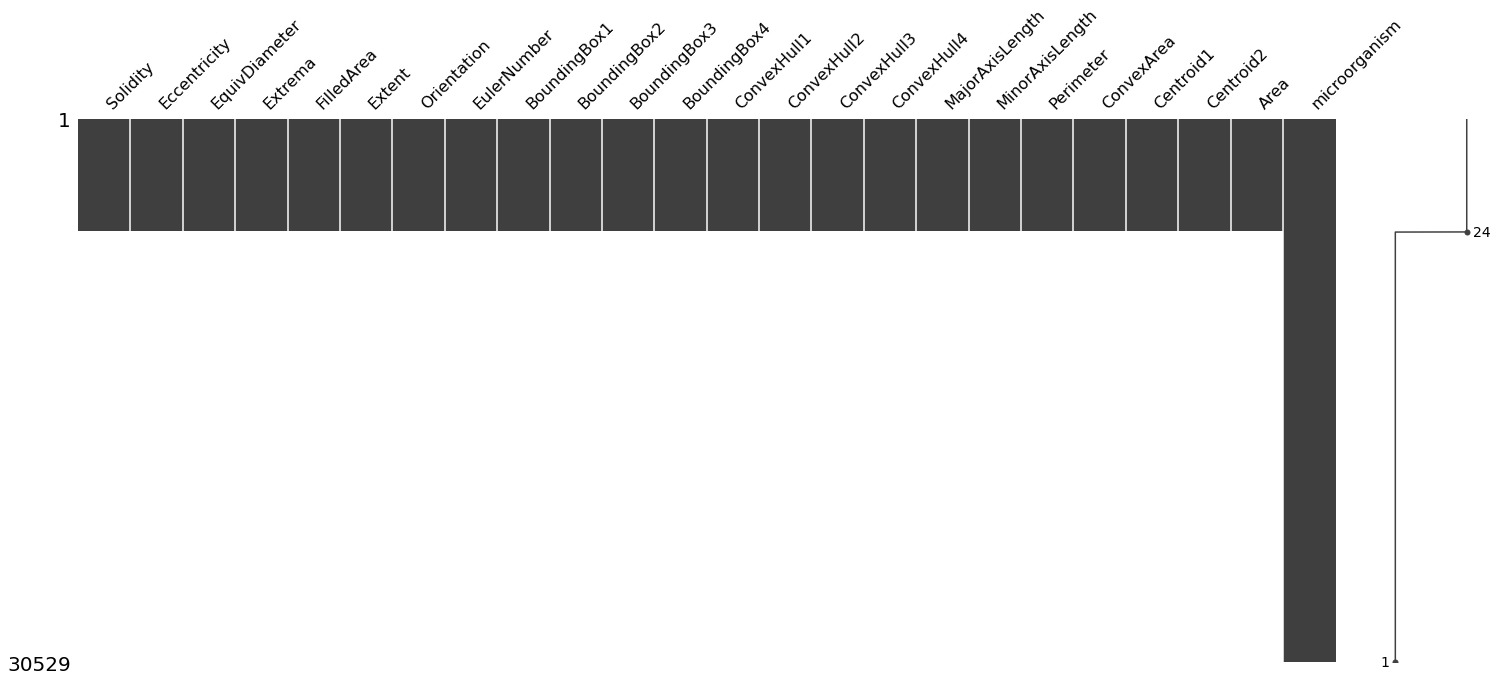

In [8]:
msno.matrix(df)

In [9]:
df = df[df['Area'].notna()]

In [10]:
df.shape

(6365, 24)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6365 entries, 0 to 6364
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         6365 non-null   float64
 1   Eccentricity     6365 non-null   float64
 2   EquivDiameter    6365 non-null   float64
 3   Extrema          6365 non-null   float64
 4   FilledArea       6365 non-null   float64
 5   Extent           6365 non-null   float64
 6   Orientation      6365 non-null   float64
 7   EulerNumber      6365 non-null   float64
 8   BoundingBox1     6365 non-null   float64
 9   BoundingBox2     6365 non-null   float64
 10  BoundingBox3     6365 non-null   float64
 11  BoundingBox4     6365 non-null   float64
 12  ConvexHull1      6365 non-null   float64
 13  ConvexHull2      6365 non-null   float64
 14  ConvexHull3      6365 non-null   float64
 15  ConvexHull4      6365 non-null   float64
 16  MajorAxisLength  6365 non-null   float64
 17  MinorAxisLengt

In [12]:
df['Perimeter'].head()

0     0.026078
1    0.0308577
2     0.047485
3    0.0522724
4    0.0324742
Name: Perimeter, dtype: object

In [13]:
df['Perimeter'] = df['Perimeter'].astype('float')

In [14]:
for i in df:
    print(f"  {i} :: maximum value is {df[i].max()}, minimum value is {df[i].min()}")

  Solidity :: maximum value is 1.0, minimum value is 0.0
  Eccentricity :: maximum value is 1.0, minimum value is 0.0
  EquivDiameter :: maximum value is 1.0, minimum value is 0.0
  Extrema :: maximum value is 1.0, minimum value is 0.0
  FilledArea :: maximum value is 0.999999999999999, minimum value is 0.0
  Extent :: maximum value is 1.0, minimum value is 0.0
  Orientation :: maximum value is 0.999999999999999, minimum value is 0.0
  EulerNumber :: maximum value is 1.0, minimum value is 0.0
  BoundingBox1 :: maximum value is 1.0, minimum value is 0.0
  BoundingBox2 :: maximum value is 1.0, minimum value is 0.0
  BoundingBox3 :: maximum value is 1.0, minimum value is 0.0
  BoundingBox4 :: maximum value is 1.0, minimum value is 0.0
  ConvexHull1 :: maximum value is 1.0, minimum value is 0.0
  ConvexHull2 :: maximum value is 0.999999999999999, minimum value is 0.0
  ConvexHull3 :: maximum value is 1.0, minimum value is 0.0
  ConvexHull4 :: maximum value is 1.0, minimum value is 0.0
  Ma

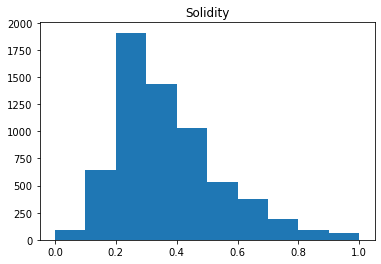

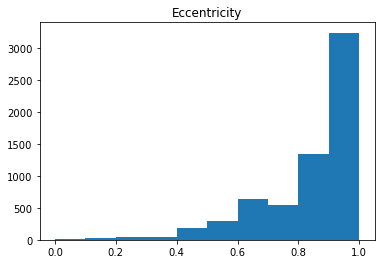

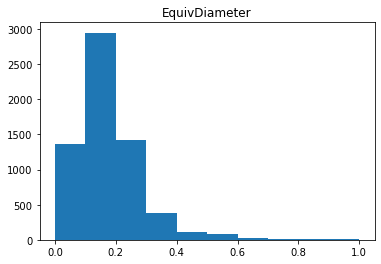

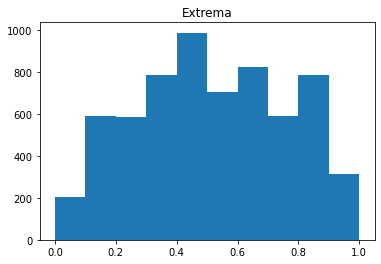

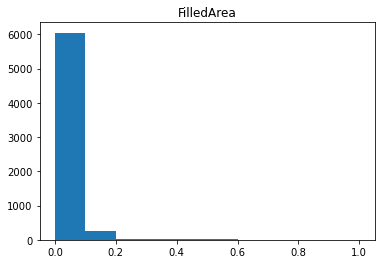

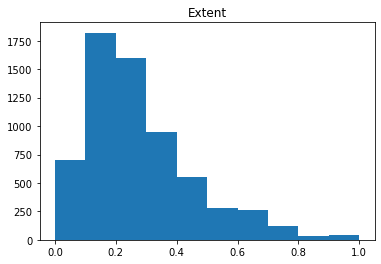

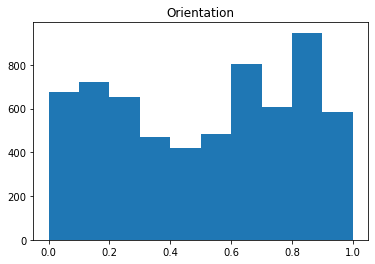

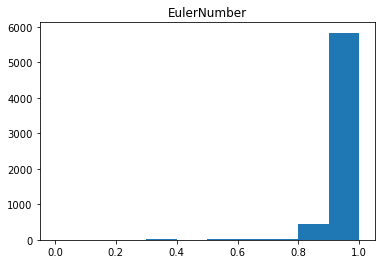

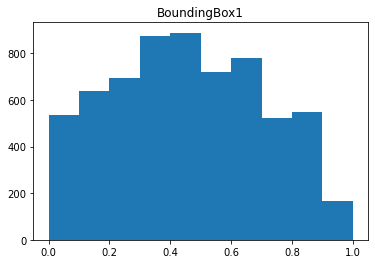

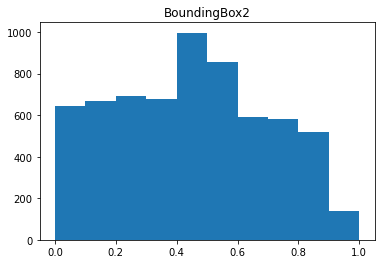

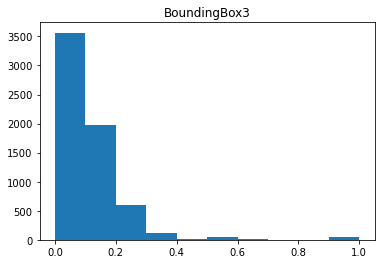

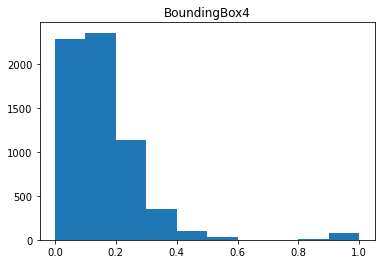

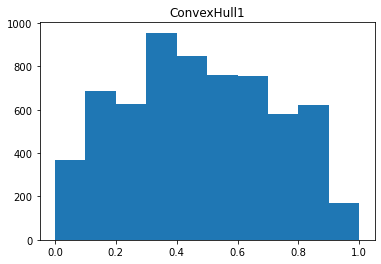

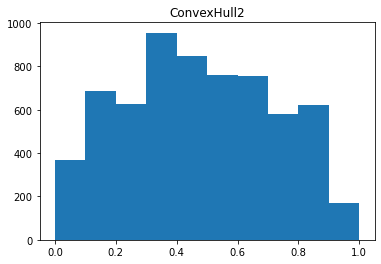

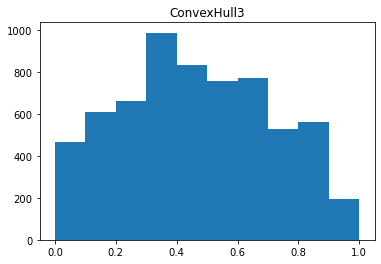

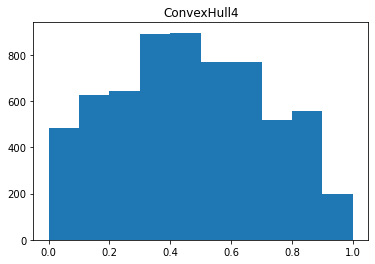

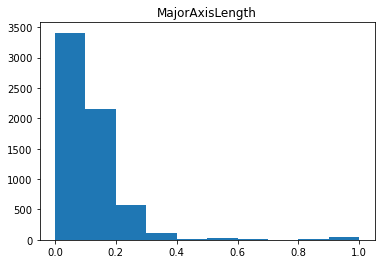

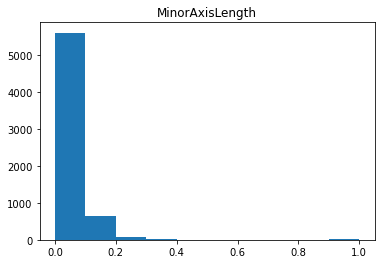

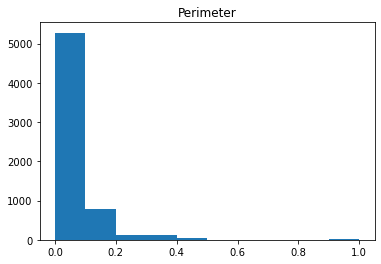

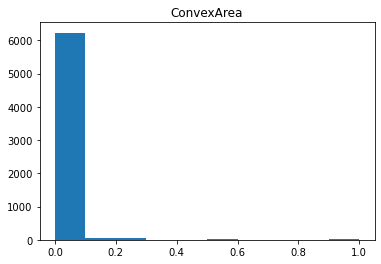

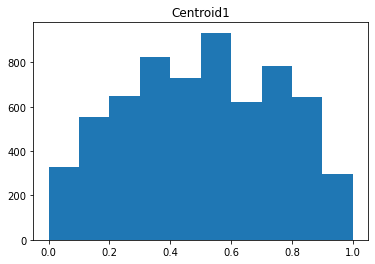

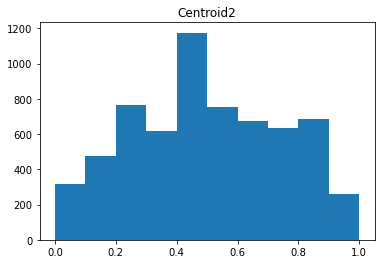

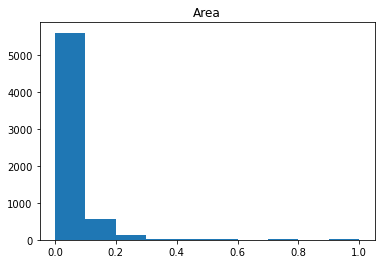

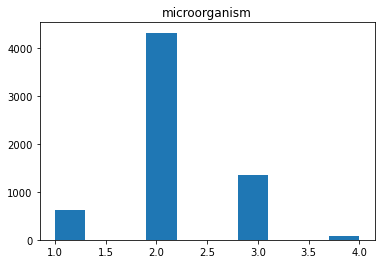

In [15]:
for i in df:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [16]:
pd.set_option('display.max_columns',None)

In [17]:
df.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.486485,0.352808,0.209923,0.154472,0.049567,0.427420,0.397009,0.968446,0.111746,0.735501,0.085804,0.106061,0.141050,0.141050,0.122540,0.113016,0.057069,0.073750,0.026078,0.007838,0.144591,0.764190,0.058232,1
1,0.526241,0.617741,0.226264,0.163227,0.046720,0.527130,0.092359,0.968781,0.130159,0.494728,0.068139,0.121212,0.137255,0.137255,0.130159,0.130159,0.063762,0.066182,0.030858,0.008220,0.151411,0.523930,0.066146,1
2,0.275985,0.749712,0.162079,0.267667,0.021195,0.225698,0.808977,0.977174,0.236825,0.869947,0.068770,0.164141,0.267552,0.267552,0.240000,0.239365,0.073771,0.062334,0.047485,0.009091,0.256178,0.903579,0.037868,1
3,0.410623,0.828166,0.186422,0.289556,0.024251,0.377933,0.913243,0.975159,0.260952,0.464851,0.057413,0.143939,0.261860,0.261860,0.262222,0.260952,0.080485,0.056312,0.052272,0.007637,0.279966,0.496005,0.047706,1
4,0.496481,0.728570,0.318669,0.481551,0.088410,0.407450,0.431428,0.952669,0.385397,0.487698,0.137539,0.149832,0.392789,0.392789,0.389206,0.388571,0.103155,0.088595,0.032474,0.015847,0.444159,0.519704,0.120092,1


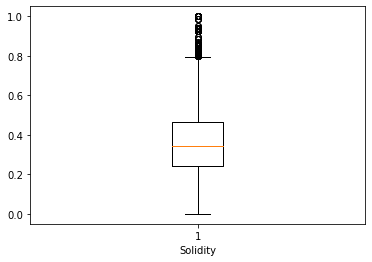

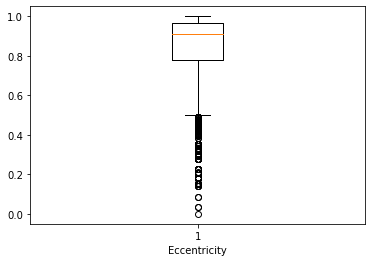

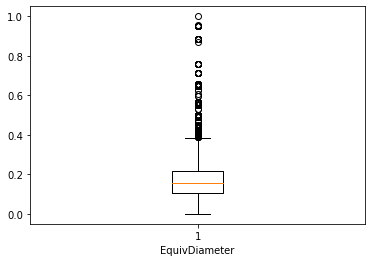

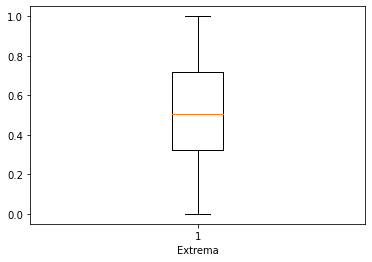

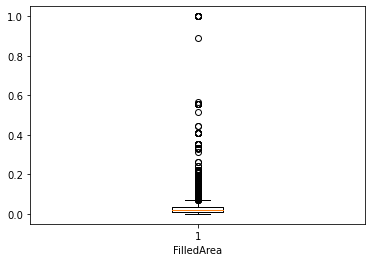

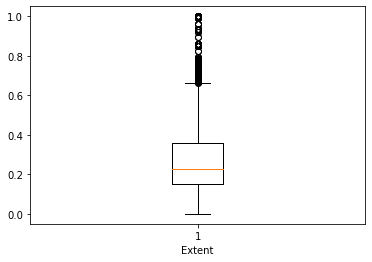

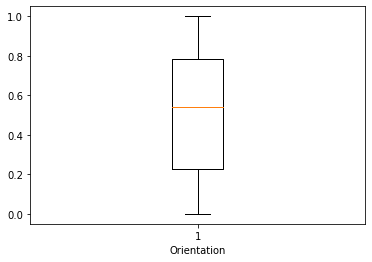

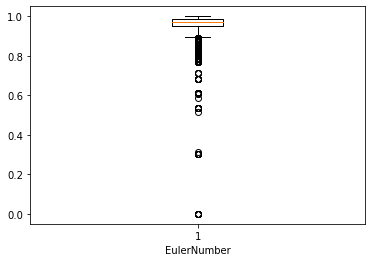

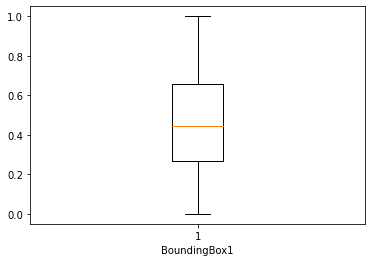

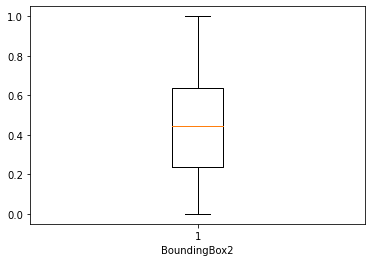

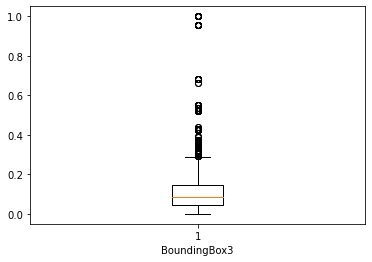

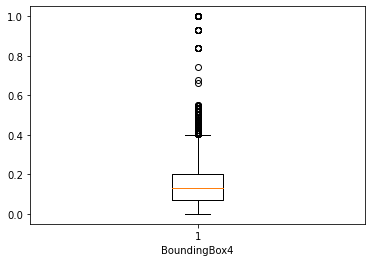

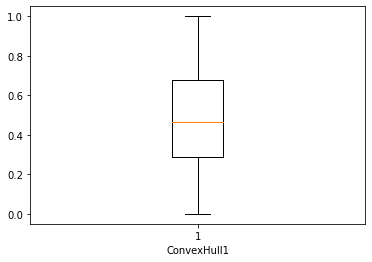

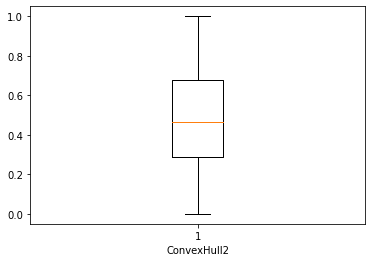

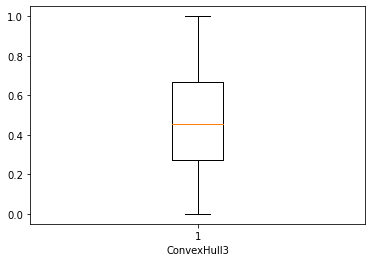

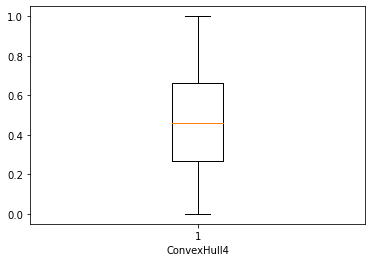

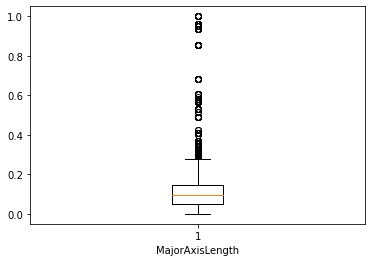

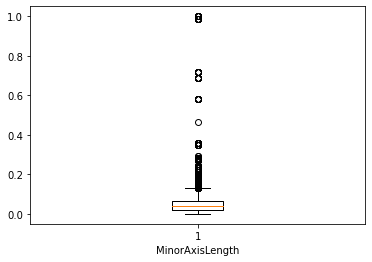

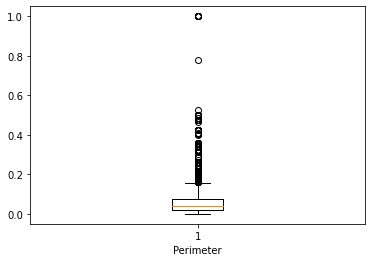

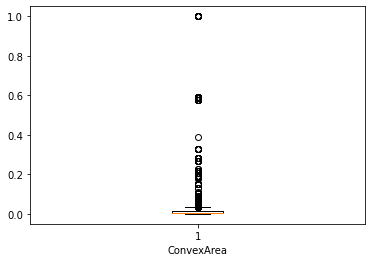

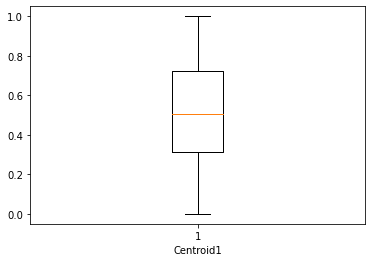

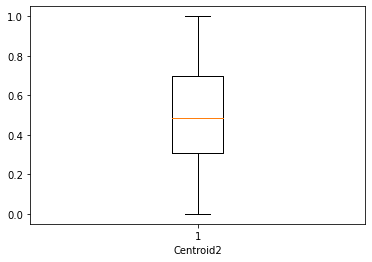

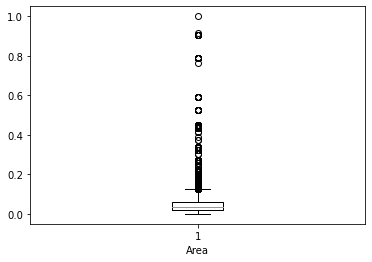

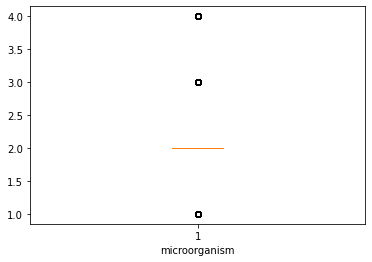

In [18]:
# outlier detection

for i in df:
    if (i != 'clust_14') or (i != 'clust_2'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [19]:
df.corr()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
Solidity,1.000000,-0.375002,-0.437941,0.081278,-0.254230,0.886729,-0.027928,0.321482,0.190881,0.090516,-0.560254,-0.567429,0.160880,0.160880,0.179302,0.178824,-0.597041,-0.416831,-0.489054,-0.322148,0.068830,-0.068814,-0.336930,-0.178486
Eccentricity,-0.375002,1.000000,-0.007425,-0.053541,-0.046110,-0.577663,0.007110,0.039767,-0.086226,-0.003784,0.134722,0.147028,-0.078442,-0.078442,-0.079500,-0.075207,0.235947,-0.189434,-0.038905,-0.075083,-0.061998,0.040158,-0.046301,0.003707
EquivDiameter,-0.437941,-0.007425,1.000000,0.058217,0.827762,-0.342038,0.042333,-0.850696,-0.101883,-0.228474,0.676826,0.756793,-0.056922,-0.056922,-0.086330,-0.084163,0.656897,0.636901,0.881315,0.472913,0.055855,-0.026789,0.927927,0.234157
Extrema,0.081278,-0.053541,0.058217,1.000000,0.062128,0.112922,-0.043785,-0.108129,0.957996,-0.040824,-0.031411,0.026598,0.963761,0.963761,0.959268,0.959047,-0.019499,-0.009361,0.026220,-0.034460,0.969629,-0.031103,0.059215,-0.030451
FilledArea,-0.254230,-0.046110,0.827762,0.062128,1.000000,-0.169771,-0.024479,-0.905537,-0.047492,-0.200431,0.499946,0.631196,-0.018922,-0.018922,-0.039864,-0.026577,0.519779,0.510840,0.772299,0.441157,0.073804,-0.043120,0.938899,0.108441
Extent,0.886729,-0.577663,-0.342038,0.112922,-0.169771,1.000000,-0.042307,0.227795,0.217649,0.072946,-0.503603,-0.507151,0.187936,0.187936,0.203781,0.202705,-0.549147,-0.265538,-0.363553,-0.232631,0.109445,-0.071212,-0.241099,-0.151982
Orientation,-0.027928,0.007110,0.042333,-0.043785,-0.024479,-0.042307,1.000000,0.022981,-0.146344,-0.049404,-0.012066,-0.015740,-0.101038,-0.101038,-0.132351,-0.145673,-0.029138,-0.043197,-0.014121,-0.092125,-0.153472,-0.052406,-0.003470,0.096883
EulerNumber,0.321482,0.039767,-0.850696,-0.108129,-0.905537,0.227795,0.022981,1.000000,0.002820,0.220632,-0.546488,-0.707593,-0.035737,-0.035737,-0.008344,-0.016275,-0.582310,-0.599320,-0.858545,-0.526088,-0.130213,0.043328,-0.950571,-0.077666
BoundingBox1,0.190881,-0.086226,-0.101883,0.957996,-0.047492,0.217649,-0.146344,0.002820,1.000000,0.004936,-0.197996,-0.082302,0.991171,0.991171,0.997115,0.997422,-0.150720,-0.099118,-0.116202,-0.101224,0.974716,-0.017394,-0.077669,-0.089845
BoundingBox2,0.090516,-0.003784,-0.228474,-0.040824,-0.200431,0.072946,-0.049404,0.220632,0.004936,1.000000,-0.162394,-0.235257,-0.016745,-0.016745,-0.003073,-0.002796,-0.184303,-0.226106,-0.228521,-0.195267,-0.038427,0.963337,-0.225734,0.027376


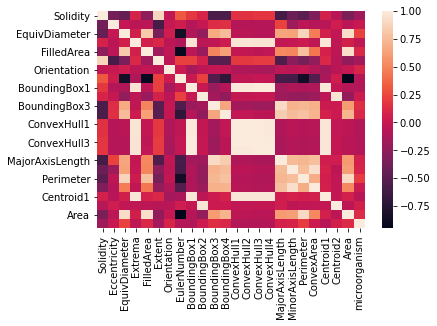

In [20]:
import seaborn as sns
sns.heatmap(df.corr())
plt.show()

In [21]:
corr_strong = []
for i in df:
    cor = df.corr()[i]
    cor = cor[cor>0.9]
    corr_strong.append(cor.to_dict())

In [22]:
corr_strong = [i for i in corr_strong if len(i)>1]
corr_strong

[{'EquivDiameter': 1.0, 'Area': 0.9279272170580785},
 {'Extrema': 1.0,
  'BoundingBox1': 0.957996448696006,
  'ConvexHull1': 0.9637605905075436,
  'ConvexHull2': 0.9637605905075429,
  'ConvexHull3': 0.9592682690758334,
  'ConvexHull4': 0.9590467344431233,
  'Centroid1': 0.9696289246562354},
 {'FilledArea': 1.0, 'Area': 0.9388988299497467},
 {'Extrema': 0.957996448696006,
  'BoundingBox1': 1.0,
  'ConvexHull1': 0.9911712813427902,
  'ConvexHull2': 0.9911712813427898,
  'ConvexHull3': 0.9971149852013621,
  'ConvexHull4': 0.9974222150228803,
  'Centroid1': 0.9747164249243079},
 {'BoundingBox2': 1.0, 'Centroid2': 0.9633374865337336},
 {'BoundingBox3': 1.0, 'MajorAxisLength': 0.9100810366019108},
 {'Extrema': 0.9637605905075436,
  'BoundingBox1': 0.9911712813427902,
  'ConvexHull1': 1.0,
  'ConvexHull2': 0.9999999999999999,
  'ConvexHull3': 0.9931156718348737,
  'ConvexHull4': 0.9903348720446635,
  'Centroid1': 0.9741051299982066},
 {'Extrema': 0.9637605905075429,
  'BoundingBox1': 0.991171

In [23]:
corr_med = []
for i in df:
    cor = df.corr()[i]
    cor = cor[(cor<=0.9)&(cor>=0.5)]
    corr_med.append(cor.to_dict())

corr_med = [i for i in corr_med if len(i)>1]
corr_med

[{'FilledArea': 0.827762273066909,
  'BoundingBox3': 0.676826006337713,
  'BoundingBox4': 0.7567931067027066,
  'MajorAxisLength': 0.6568972398644762,
  'MinorAxisLength': 0.6369009160668542,
  'Perimeter': 0.8813149450116453},
 {'EquivDiameter': 0.827762273066909,
  'BoundingBox4': 0.6311957975027731,
  'MajorAxisLength': 0.519779186239047,
  'MinorAxisLength': 0.5108396534685016,
  'Perimeter': 0.7722991704512757},
 {'EquivDiameter': 0.676826006337713,
  'BoundingBox4': 0.6510133705736464,
  'MinorAxisLength': 0.7141595383975768,
  'Perimeter': 0.738826394647119,
  'ConvexArea': 0.7076583209114935,
  'Area': 0.6089106999083757},
 {'EquivDiameter': 0.7567931067027066,
  'FilledArea': 0.6311957975027731,
  'BoundingBox3': 0.6510133705736464,
  'MajorAxisLength': 0.8449097851411135,
  'MinorAxisLength': 0.763642175720573,
  'Perimeter': 0.7878223830985864,
  'ConvexArea': 0.7145265436391668,
  'Area': 0.7189886922400028},
 {'EquivDiameter': 0.6568972398644762,
  'FilledArea': 0.51977918

In [24]:
corr_low = []
for i in df:
    cor = df.corr()[i]
    cor = cor[cor<0.5]
    corr_low.append(cor.index.tolist())

corr_low = [i for i in corr_low if len(i)>1]
corr_low

[['Eccentricity',
  'EquivDiameter',
  'Extrema',
  'FilledArea',
  'Orientation',
  'EulerNumber',
  'BoundingBox1',
  'BoundingBox2',
  'BoundingBox3',
  'BoundingBox4',
  'ConvexHull1',
  'ConvexHull2',
  'ConvexHull3',
  'ConvexHull4',
  'MajorAxisLength',
  'MinorAxisLength',
  'Perimeter',
  'ConvexArea',
  'Centroid1',
  'Centroid2',
  'Area',
  'microorganism'],
 ['Solidity',
  'EquivDiameter',
  'Extrema',
  'FilledArea',
  'Extent',
  'Orientation',
  'EulerNumber',
  'BoundingBox1',
  'BoundingBox2',
  'BoundingBox3',
  'BoundingBox4',
  'ConvexHull1',
  'ConvexHull2',
  'ConvexHull3',
  'ConvexHull4',
  'MajorAxisLength',
  'MinorAxisLength',
  'Perimeter',
  'ConvexArea',
  'Centroid1',
  'Centroid2',
  'Area',
  'microorganism'],
 ['Solidity',
  'Eccentricity',
  'Extrema',
  'Extent',
  'Orientation',
  'EulerNumber',
  'BoundingBox1',
  'BoundingBox2',
  'ConvexHull1',
  'ConvexHull2',
  'ConvexHull3',
  'ConvexHull4',
  'ConvexArea',
  'Centroid1',
  'Centroid2',
  'mi

In [25]:
df.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.486485,0.352808,0.209923,0.154472,0.049567,0.427420,0.397009,0.968446,0.111746,0.735501,0.085804,0.106061,0.141050,0.141050,0.122540,0.113016,0.057069,0.073750,0.026078,0.007838,0.144591,0.764190,0.058232,1
1,0.526241,0.617741,0.226264,0.163227,0.046720,0.527130,0.092359,0.968781,0.130159,0.494728,0.068139,0.121212,0.137255,0.137255,0.130159,0.130159,0.063762,0.066182,0.030858,0.008220,0.151411,0.523930,0.066146,1
2,0.275985,0.749712,0.162079,0.267667,0.021195,0.225698,0.808977,0.977174,0.236825,0.869947,0.068770,0.164141,0.267552,0.267552,0.240000,0.239365,0.073771,0.062334,0.047485,0.009091,0.256178,0.903579,0.037868,1
3,0.410623,0.828166,0.186422,0.289556,0.024251,0.377933,0.913243,0.975159,0.260952,0.464851,0.057413,0.143939,0.261860,0.261860,0.262222,0.260952,0.080485,0.056312,0.052272,0.007637,0.279966,0.496005,0.047706,1
4,0.496481,0.728570,0.318669,0.481551,0.088410,0.407450,0.431428,0.952669,0.385397,0.487698,0.137539,0.149832,0.392789,0.392789,0.389206,0.388571,0.103155,0.088595,0.032474,0.015847,0.444159,0.519704,0.120092,1


In [26]:
df['microorganism'].value_counts()

2    4320
3    1350
1     613
4      82
Name: microorganism, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(df.drop('microorganism', axis=1), df['microorganism'])
df.shape, X.shape, y.shape

((6365, 24), (17280, 23), (17280,))

In [28]:
y.value_counts()

4    4320
3    4320
2    4320
1    4320
Name: microorganism, dtype: int64

In [29]:
df2 = pd.concat([X,y], axis=1)
df2.shape, df.shape, X.shape

((17280, 24), (6365, 24), (17280, 23))

In [30]:
df2.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.486485,0.352808,0.209923,0.154472,0.049567,0.427420,0.397009,0.968446,0.111746,0.735501,0.085804,0.106061,0.141050,0.141050,0.122540,0.113016,0.057069,0.073750,0.026078,0.007838,0.144591,0.764190,0.058232,1
1,0.526241,0.617741,0.226264,0.163227,0.046720,0.527130,0.092359,0.968781,0.130159,0.494728,0.068139,0.121212,0.137255,0.137255,0.130159,0.130159,0.063762,0.066182,0.030858,0.008220,0.151411,0.523930,0.066146,1
2,0.275985,0.749712,0.162079,0.267667,0.021195,0.225698,0.808977,0.977174,0.236825,0.869947,0.068770,0.164141,0.267552,0.267552,0.240000,0.239365,0.073771,0.062334,0.047485,0.009091,0.256178,0.903579,0.037868,1
3,0.410623,0.828166,0.186422,0.289556,0.024251,0.377933,0.913243,0.975159,0.260952,0.464851,0.057413,0.143939,0.261860,0.261860,0.262222,0.260952,0.080485,0.056312,0.052272,0.007637,0.279966,0.496005,0.047706,1
4,0.496481,0.728570,0.318669,0.481551,0.088410,0.407450,0.431428,0.952669,0.385397,0.487698,0.137539,0.149832,0.392789,0.392789,0.389206,0.388571,0.103155,0.088595,0.032474,0.015847,0.444159,0.519704,0.120092,1


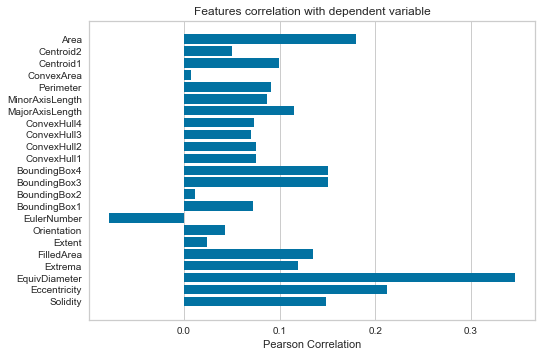

In [33]:
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation()
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
plt.show()

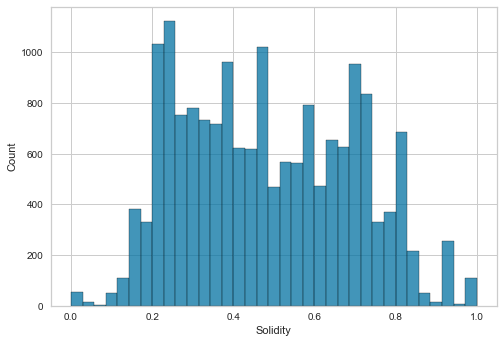

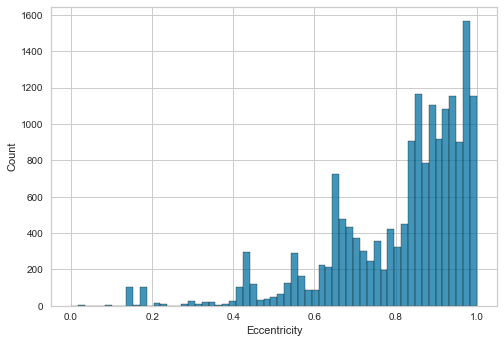

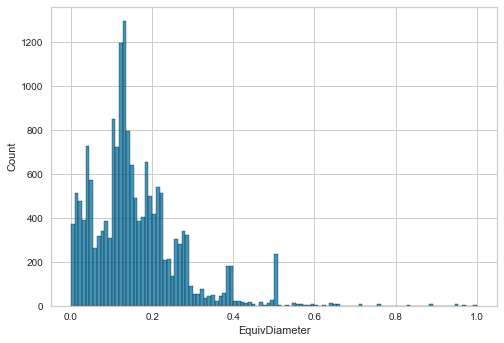

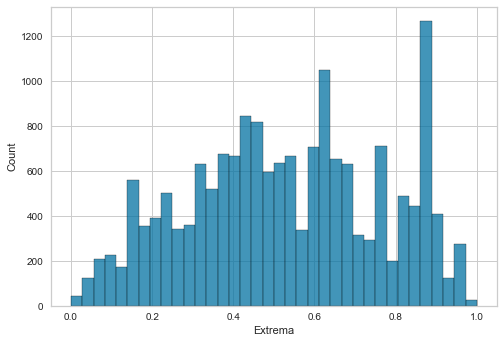

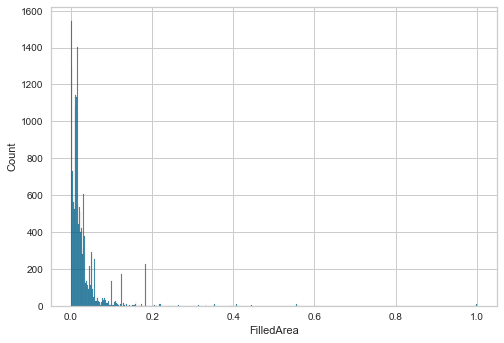

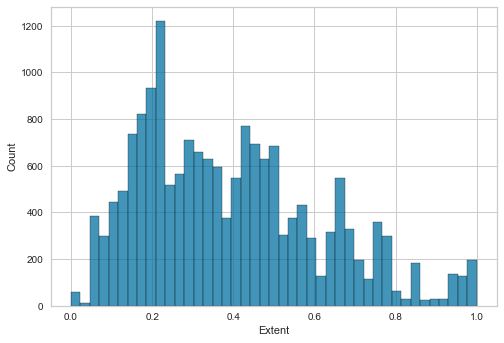

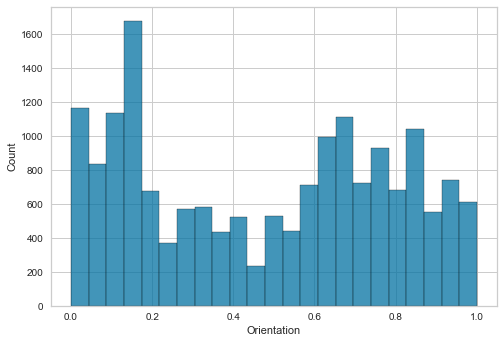

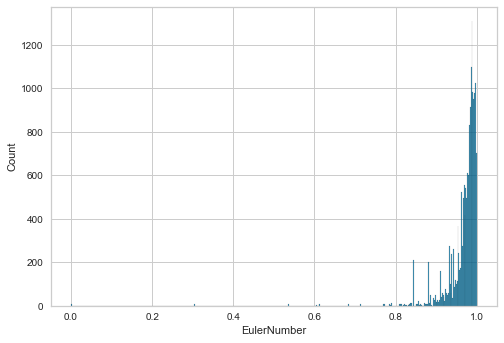

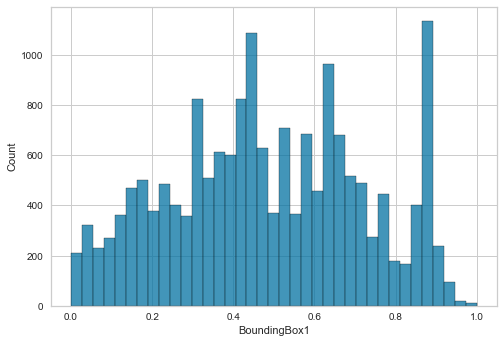

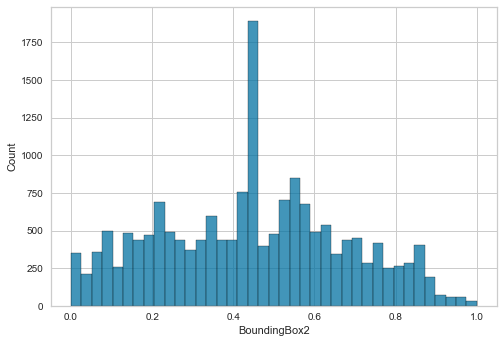

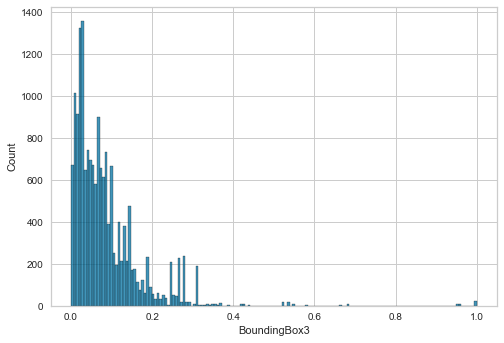

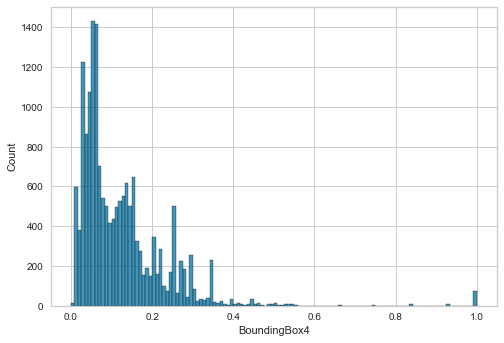

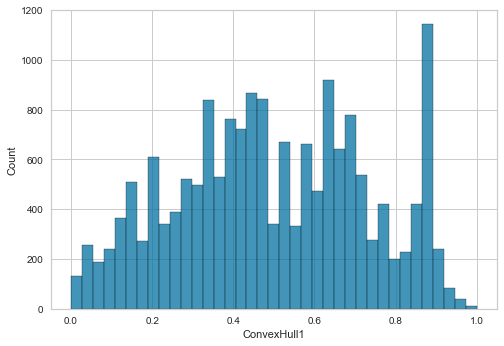

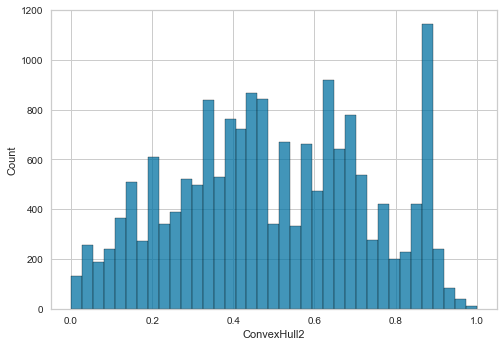

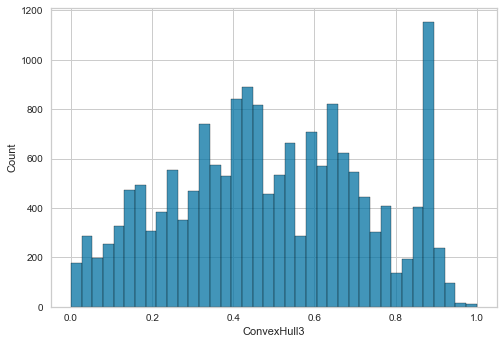

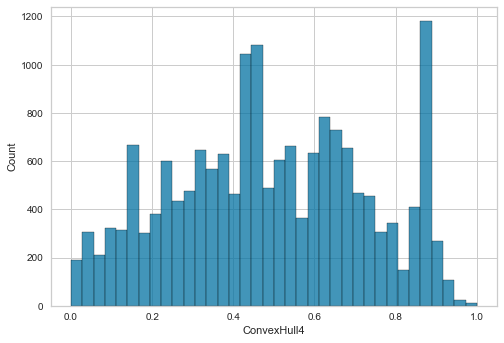

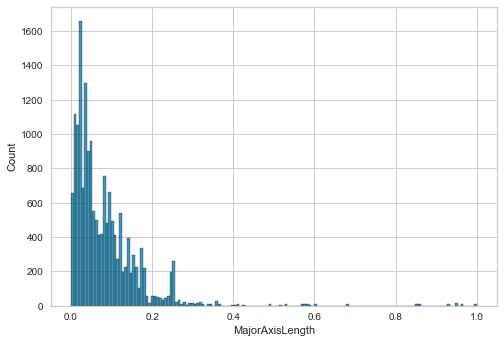

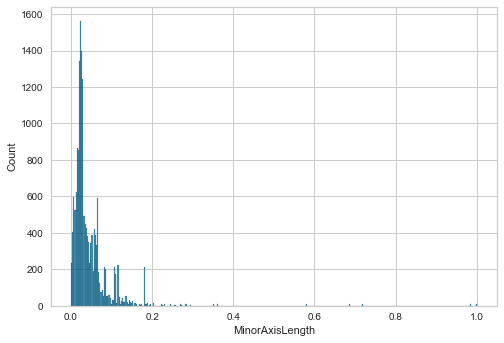

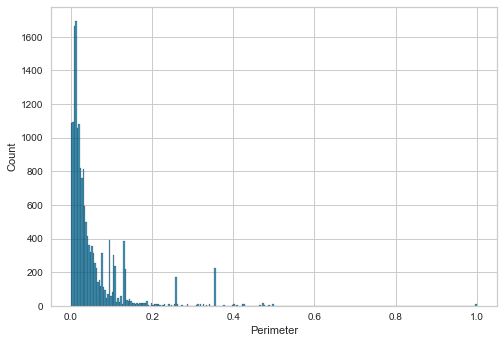

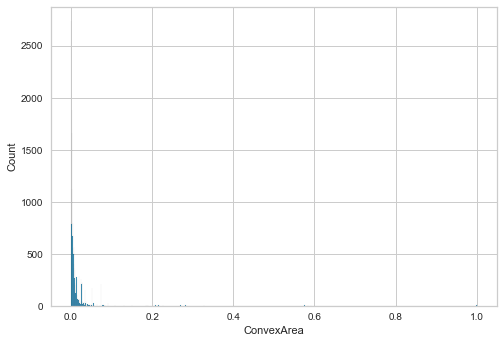

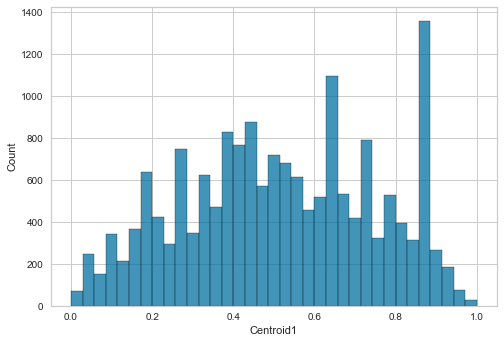

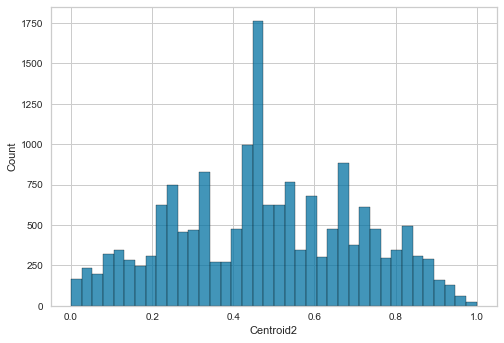

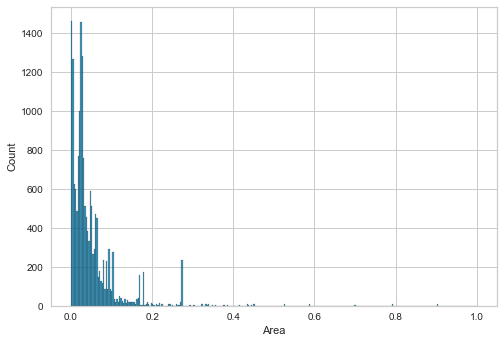

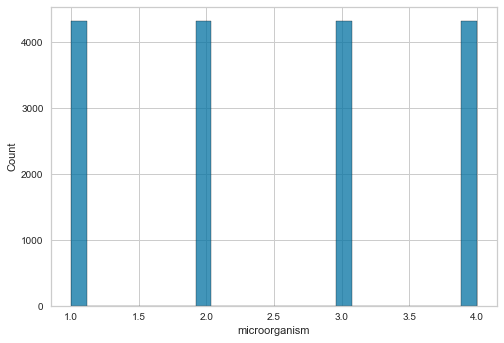

In [38]:
for col in df2:
    sns.histplot(df2[col])
    plt.show()

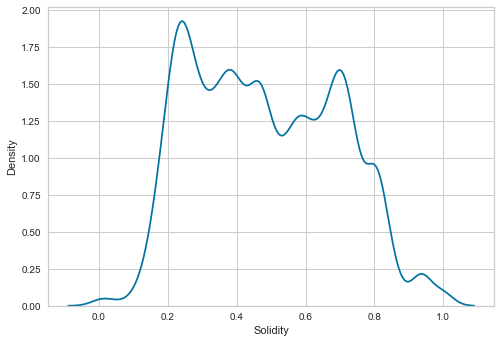

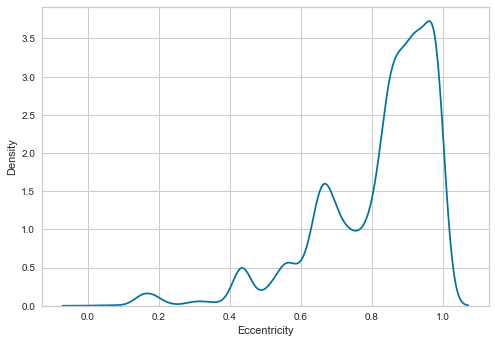

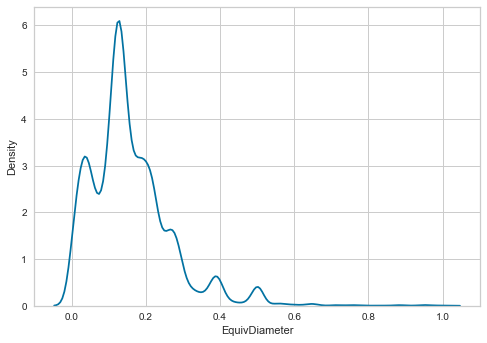

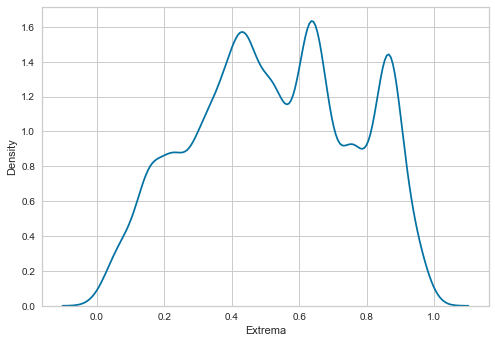

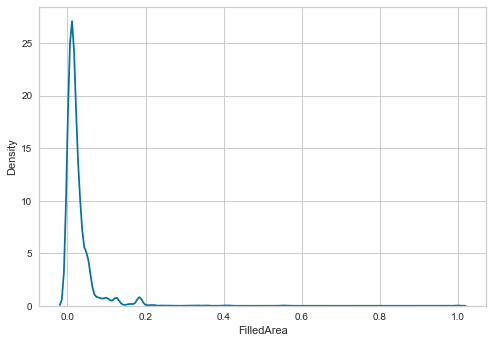

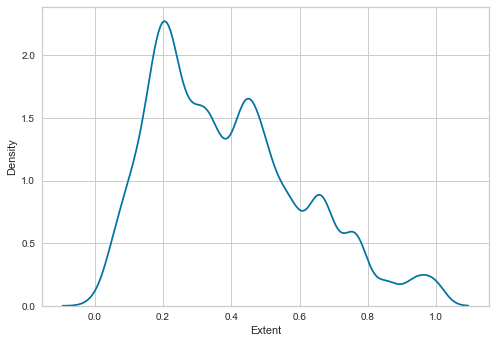

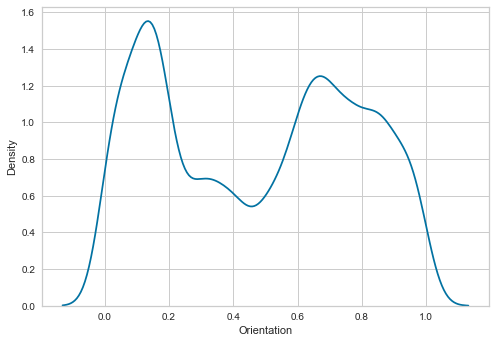

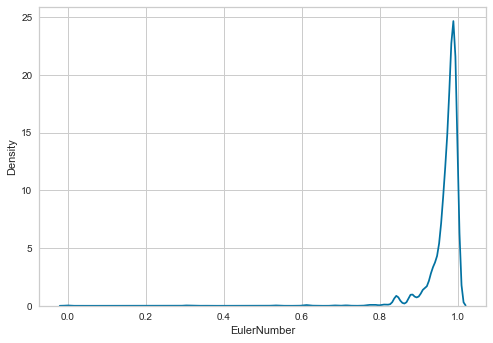

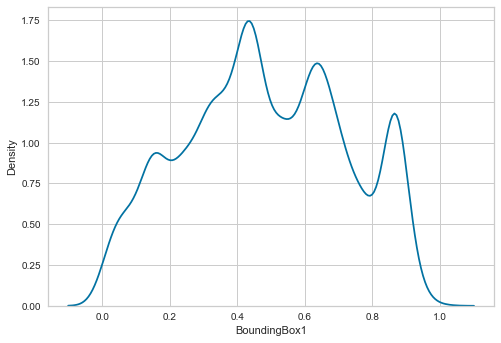

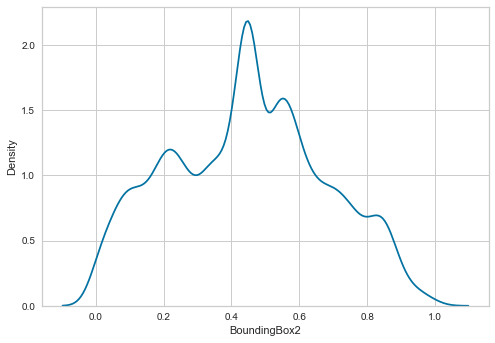

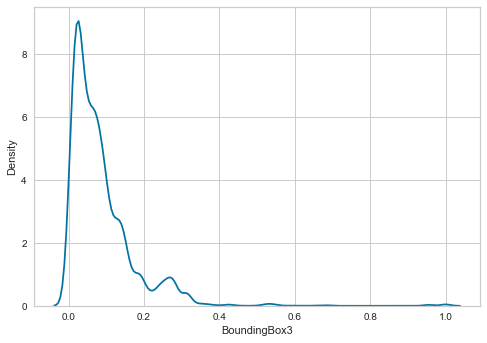

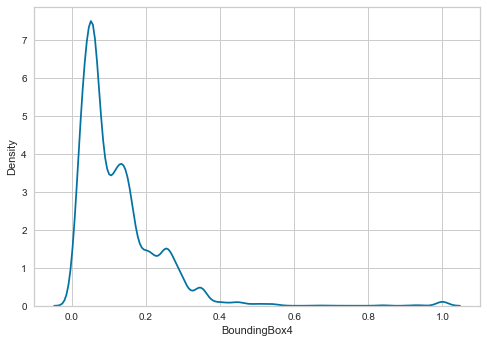

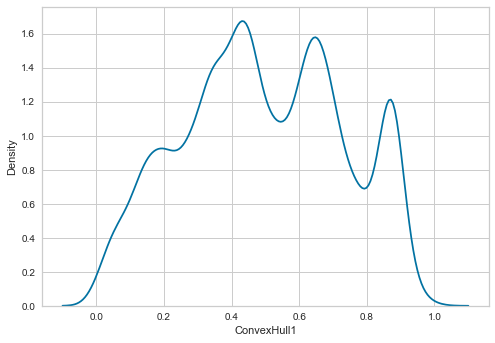

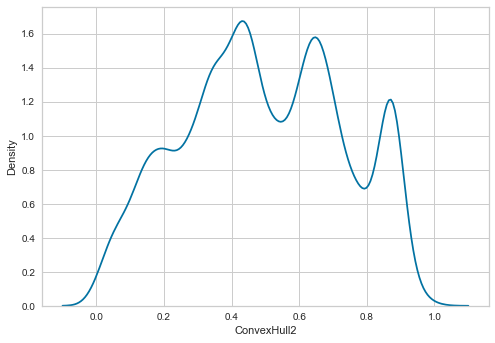

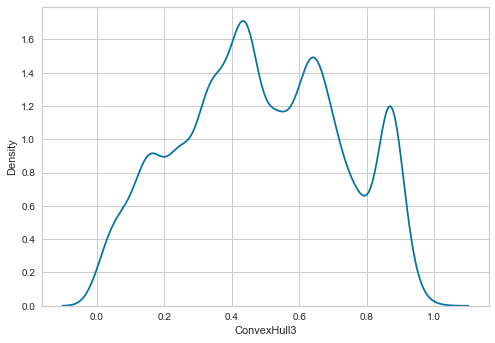

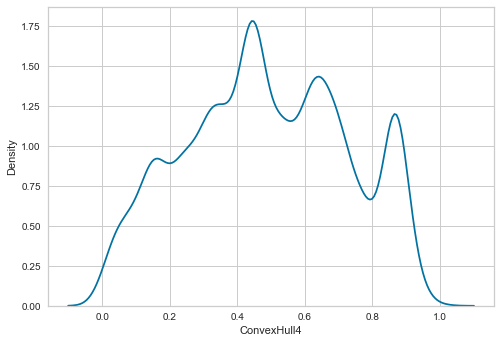

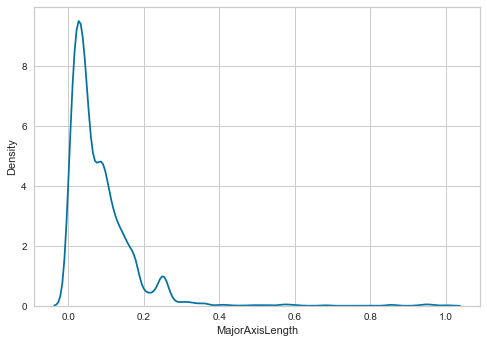

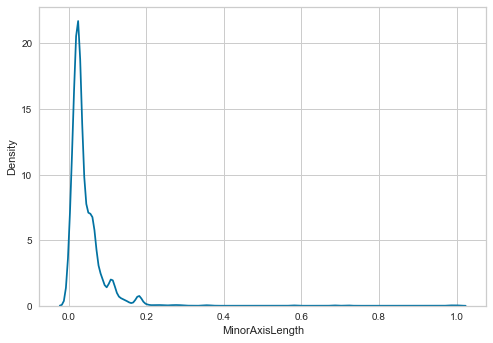

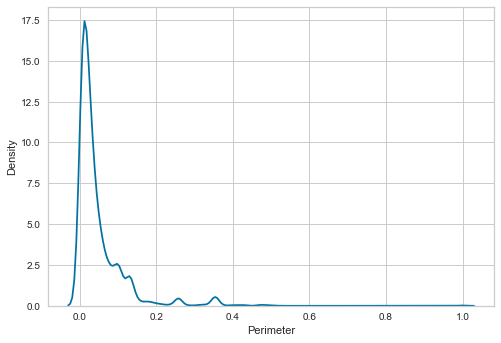

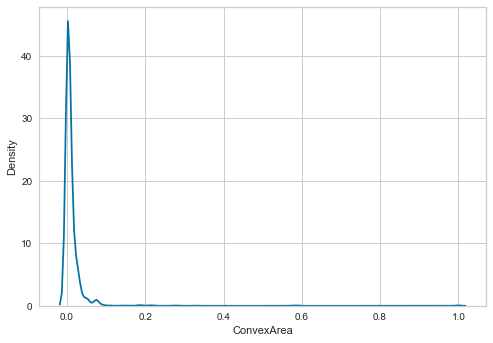

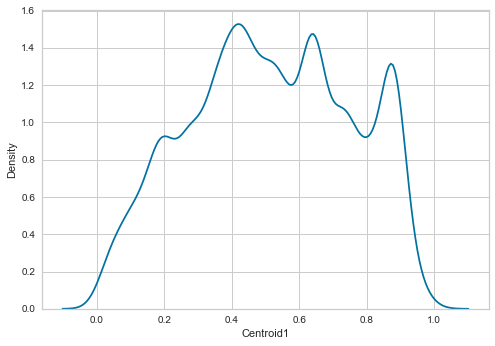

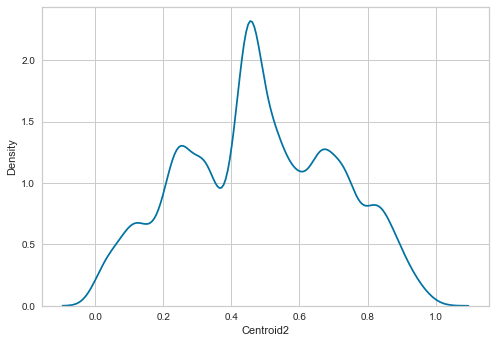

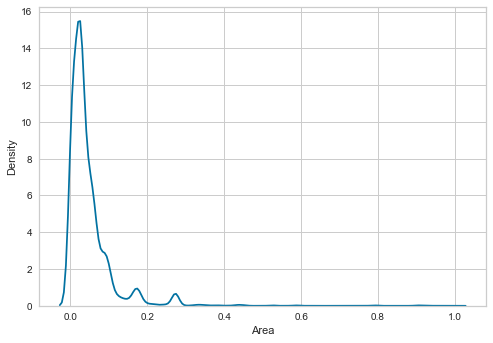

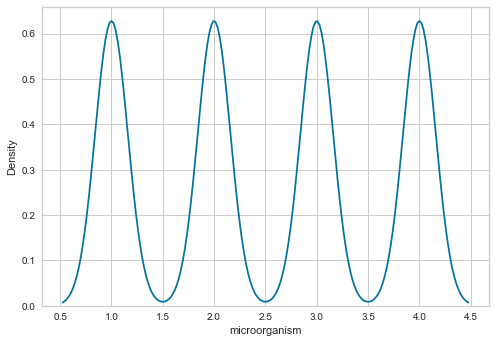

In [39]:
for col in df2:
    sns.kdeplot(df2[col])
    plt.show()

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


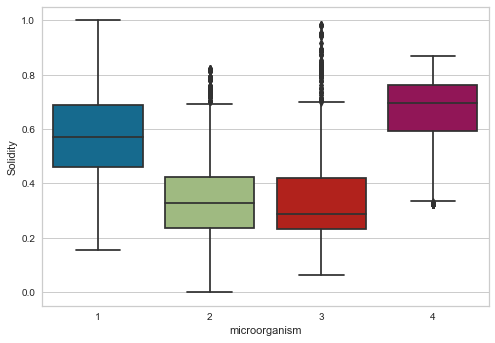

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


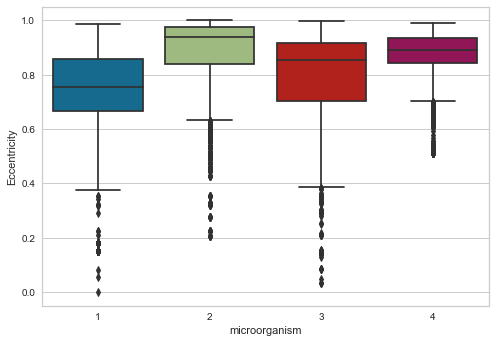

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


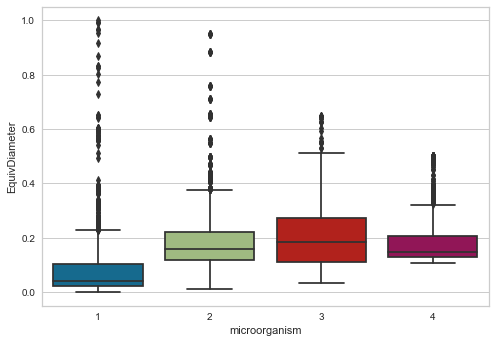

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


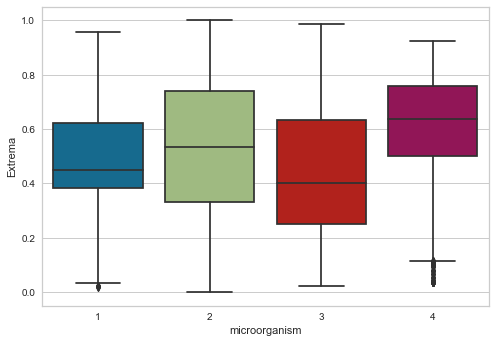

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


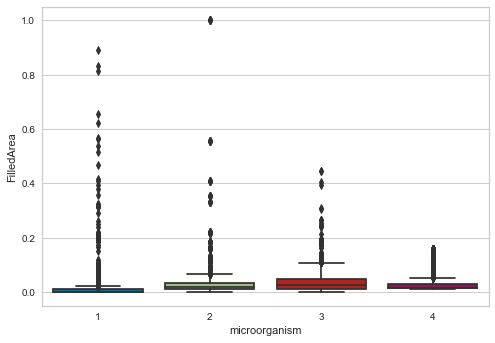

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


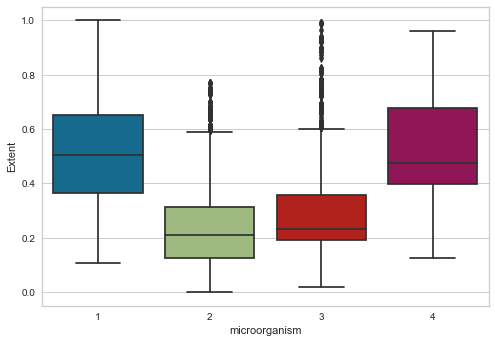

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


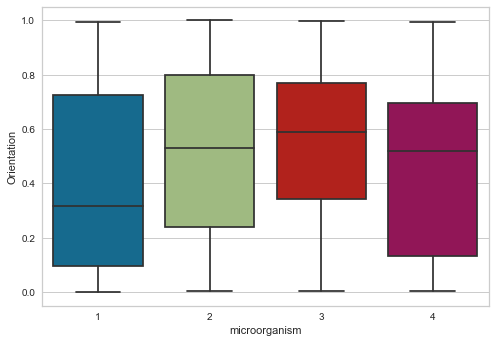

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


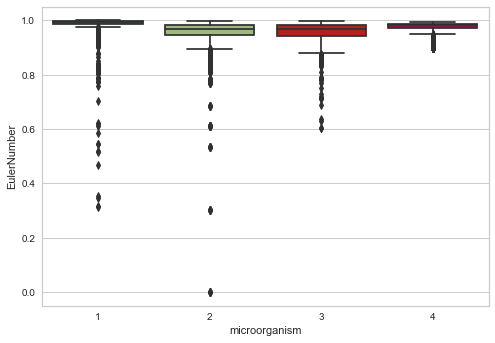

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


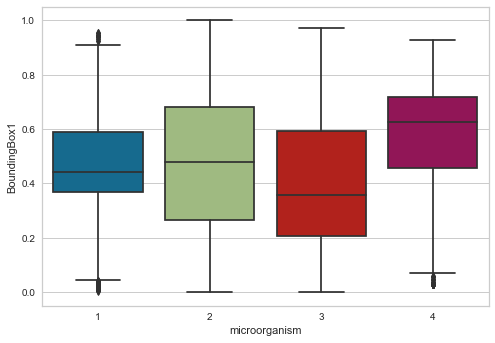

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


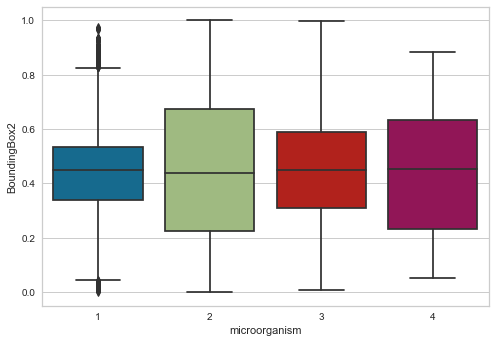

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


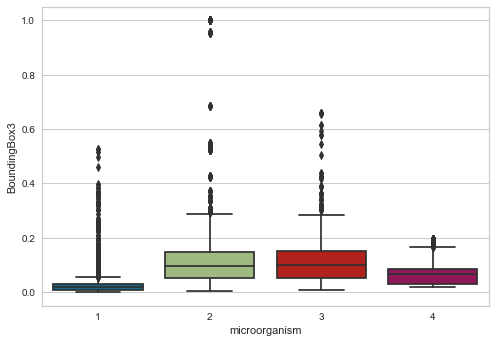

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


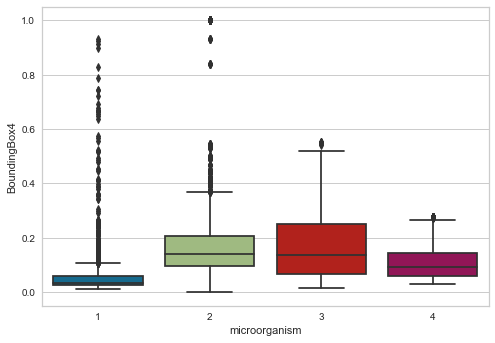

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


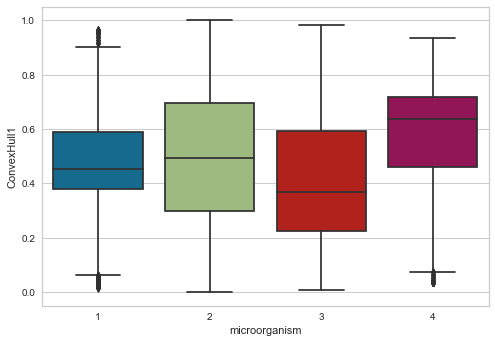

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


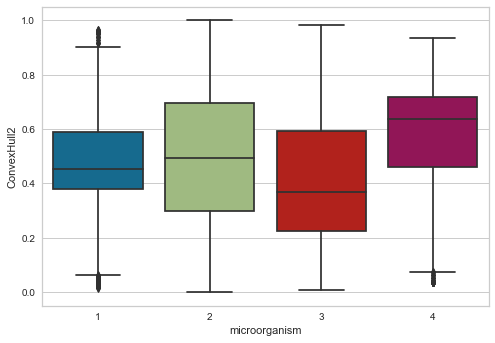

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


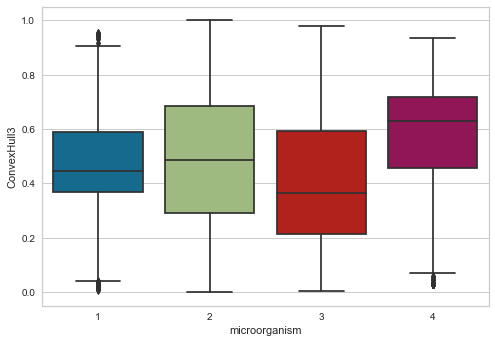

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


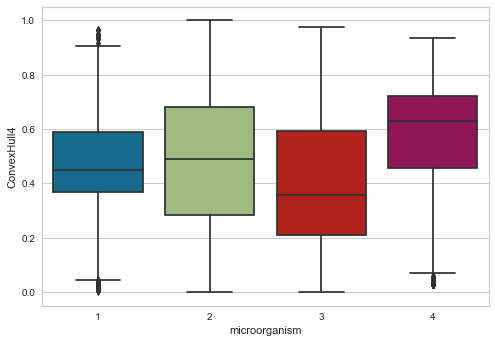

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


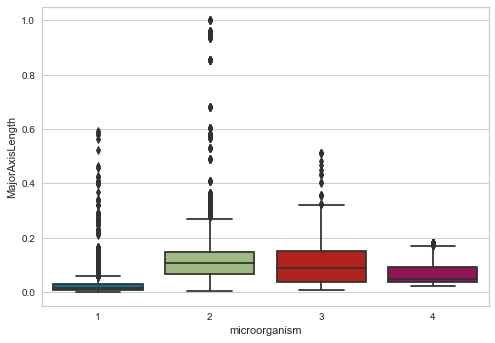

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


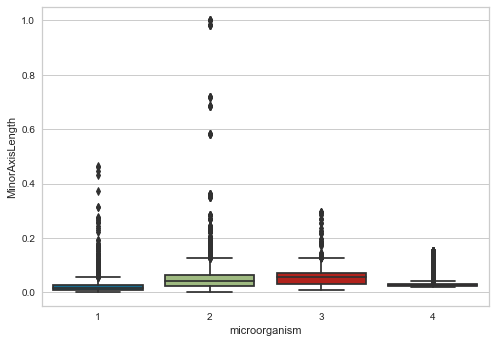

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


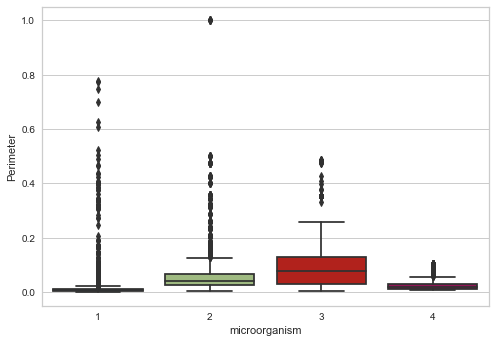

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


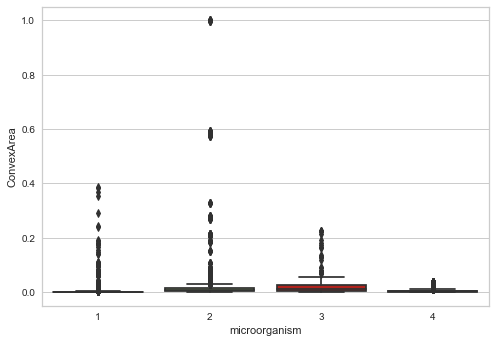

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


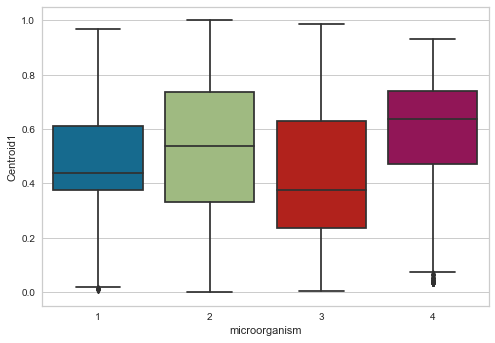

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


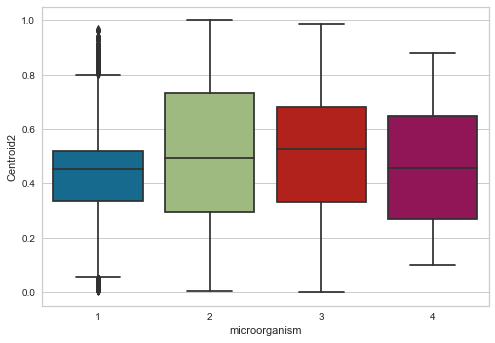

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


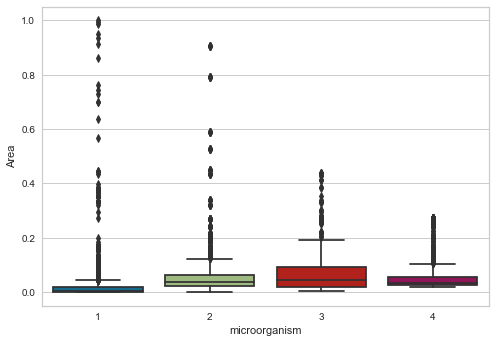

C:\Users\satyapati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


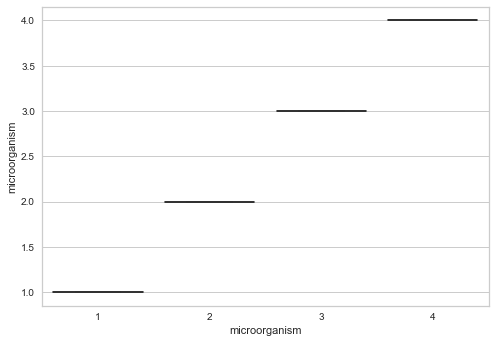

In [40]:
for col in df2:
    sns.boxplot(df2['microorganism'], df2[col])
    plt.show()

In [43]:
for i in df2:
    print(i)
    print("--------------")
    m_grp = df2.groupby('microorganism')[i].describe()[['min', 'max', 'mean', '50%', 'std']]
    print(m_grp)
    print("\n\n")

Solidity
--------------
                    min       max      mean       50%       std
microorganism                                                  
1              0.156342  1.000000  0.576603  0.570571  0.174984
2              0.000000  0.822496  0.345856  0.328848  0.151705
3              0.062539  0.984914  0.343269  0.286759  0.153829
4              0.325817  0.870852  0.669965  0.696687  0.126909



Eccentricity
--------------
                    min       max      mean       50%       std
microorganism                                                  
1              0.000000  0.986321  0.730430  0.753542  0.198499
2              0.208638  1.000000  0.876131  0.940750  0.146144
3              0.033647  0.996807  0.793992  0.855158  0.160392
4              0.510339  0.991839  0.863498  0.889458  0.106019



EquivDiameter
--------------
                    min       max      mean       50%       std
microorganism                                                  
1              0.

4              0.001543  0.037520  0.005799  0.003017  0.007149



Centroid1
--------------
                    min       max      mean       50%       std
microorganism                                                  
1              0.010595  0.967337  0.500194  0.439275  0.226170
2              0.000000  1.000000  0.524401  0.538778  0.252129
3              0.005426  0.986123  0.447810  0.377433  0.240439
4              0.037289  0.932813  0.596501  0.636866  0.207419



Centroid2
--------------
                    min       max      mean       50%       std
microorganism                                                  
1              0.005099  0.968636  0.435065  0.454100  0.204829
2              0.003771  1.000000  0.505629  0.492882  0.254412
3              0.000000  0.985598  0.519652  0.526843  0.218361
4              0.100028  0.878935  0.463915  0.456887  0.210023



Area
--------------
                    min       max      mean       50%       std
microorganism            

In [44]:
# One way anova doesn't allow us to compare the mean of a group to be compared with another group. 
# To achieve this we should go for tukey's test. 
from statsmodels.sandbox.stats.multicomp import MultiComparison

for col in df2:
    print(col)
    print("---------")
    mul = MultiComparison(df2[col], df2['microorganism'])
    res = mul.tukeyhsd()
    print(res)
    print("\n\n")

Solidity
---------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.2307  0.001 -0.2392 -0.2223   True
     1      3  -0.2333  0.001 -0.2418 -0.2249   True
     1      4   0.0934  0.001  0.0849  0.1018   True
     2      3  -0.0026 0.8435  -0.011  0.0059  False
     2      4   0.3241  0.001  0.3157  0.3326   True
     3      4   0.3267  0.001  0.3182  0.3351   True
----------------------------------------------------



Eccentricity
---------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   0.1457 0.001  0.1371  0.1543   True
     1      3   0.0636 0.001  0.0549  0.0722   True
     1      4   0.1331 0.001  0.1244  0.1417   True
     2      3  -0.0821 0.001 -0.0908 -0.0735   True
     2      4  -0.0126 0.001 -0.0213  -0.004   True
     3   

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0169 0.0038 -0.0296 -0.0041   True
     1      3  -0.0936  0.001 -0.1064 -0.0809   True
     1      4   0.0773  0.001  0.0645    0.09   True
     2      3  -0.0768  0.001 -0.0895  -0.064   True
     2      4   0.0941  0.001  0.0814  0.1069   True
     3      4   0.1709  0.001  0.1582  0.1836   True
----------------------------------------------------



MajorAxisLength
---------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   0.1055 0.001  0.1012  0.1098   True
     1      3    0.078 0.001  0.0737  0.0824   True
     1      4   0.0394 0.001   0.035  0.0437   True
     2      3  -0.0275 0.001 -0.0318 -0.0231   True
     2      4  -0.0661 0.001 -0.0705 -0.0618   True
     3      4  -0.0386 0.

C:\Users\satyapati\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


In [ ]:
# Shapiro and levene's test for normality and same variance
for i in df2:
    print(i)
    print("----------")
    print(stats.)

In [50]:
from sklearn import feature_selection
var_t = feature_selection.VarianceThreshold(threshold=0.005)
X_new = var_t.fit_transform(X)
X_new.shape, X.shape

((17280, 17), (17280, 23))

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rfe = feature_selection.RFE(rf)
X2 = rfe.fit_transform(X,y)
X2.shape, X.shape

((17280, 11), (17280, 23))

In [75]:
print(len(X.columns[rfe.support_]))
rfe = X.columns[rfe.support_]

11


In [55]:
kb = feature_selection.SelectKBest()
X_3 = kb.fit_transform(X,y)
X_3.shape, X.shape

((17280, 10), (17280, 23))

In [58]:
X.columns[kb.get_support()]

Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extent', 'EulerNumber',
       'BoundingBox3', 'BoundingBox4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter'],
      dtype='object')

In [59]:
sel_mod = feature_selection.SelectFromModel(rf)
X_4 = sel_mod.fit_transform(X,y)
X_4.shape, X.shape

((17280, 11), (17280, 23))

In [63]:
from sklearn import model_selection, metrics
acc = []
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y,test_size=0.2)
for i in range(1,23):
    rf = RandomForestClassifier()
    kb = feature_selection.SelectKBest(feature_selection.f_classif, k=i)
    X_new = kb.fit_transform(X_tr,y_tr)
    X_new_te = X_te[X_te.columns[kb.get_support()]]
    rf.fit(X_new, y_tr)
    acc.append(rf.score(X_new_te, y_te))

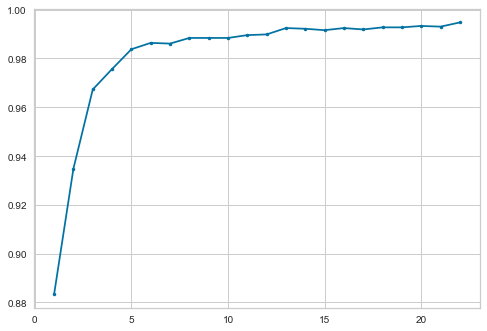

In [66]:
plt.plot(range(1,23), acc, marker='.')
plt.show()

In [106]:
kb = feature_selection.SelectKBest(feature_selection.f_classif, k=5)
kb.fit(X_tr,y_tr)
kb = X.columns[kb.get_support()]
X_kb = X[kb]

In [73]:
sel_mod = X.columns[sel_mod.get_support()]

In [83]:
feat = pd.DataFrame()
feat['features'] = X.columns
feat.index = feat['features']

feat['kb'] = feat['features'].isin(kb)
feat['rfe'] = feat['features'].isin(rfe)
feat['sel_mod'] = feat['features'].isin(sel_mod)

In [84]:
feat.drop('features', axis=1, inplace=True)
feat['kb'] = feat['kb'].astype('int')
feat['rfe'] = feat['rfe'].astype('int')
feat['sel_mod'] = feat['sel_mod'].astype('int')

In [85]:
feat['sum'] = feat.sum(axis=1)
feat = feat[feat['sum']!=0]

In [86]:
feat

,kb,rfe,sel_mod,sum
features,,,,
Solidity,1,1,1,3
Eccentricity,0,1,1,2
EquivDiameter,1,1,1,3
FilledArea,0,1,1,2
Extent,1,1,1,3
BoundingBox3,1,1,1,3
MajorAxisLength,1,1,1,3
MinorAxisLength,0,1,1,2
Perimeter,0,1,1,2


In [90]:
for i in df2:
    print(f"{i} \t {df2[i].var()}")

Solidity 	 0.04385977870860609
Eccentricity 	 0.0278470223475932
EquivDiameter 	 0.012155024935350723
Extrema 	 0.05643747606687372
FilledArea 	 0.002147500917375303
Extent 	 0.048613811671326466
Orientation 	 0.09568528149574942
EulerNumber 	 0.002206468442316307
BoundingBox1 	 0.05698616426934138
BoundingBox2 	 0.05235871492235955
BoundingBox3 	 0.008032211992043023
BoundingBox4 	 0.01236355927958726
ConvexHull1 	 0.055474814323614056
ConvexHull2 	 0.055474814323614084
ConvexHull3 	 0.05645659095072633
ConvexHull4 	 0.05679744452412682
MajorAxisLength 	 0.0077437301233594345
MinorAxisLength 	 0.0028811396260508618
Perimeter 	 0.0048972393059708765
ConvexArea 	 0.0018626804868369738
Centroid1 	 0.056740883084909606
Centroid2 	 0.050735104511260634
Area 	 0.004224182015421115
microorganism 	 1.25007234214943


In [91]:
for i in df2:
    res=0
    if i in feat.index:
        res = feat.loc[i,'sum']
        print(f"{i} \t {df2[i].var()} \t {res}")

Solidity 	 0.04385977870860609 	 3
Eccentricity 	 0.0278470223475932 	 2
EquivDiameter 	 0.012155024935350723 	 3
FilledArea 	 0.002147500917375303 	 2
Extent 	 0.048613811671326466 	 3
BoundingBox3 	 0.008032211992043023 	 3
MajorAxisLength 	 0.0077437301233594345 	 3
MinorAxisLength 	 0.0028811396260508618 	 2
Perimeter 	 0.0048972393059708765 	 2
ConvexArea 	 0.0018626804868369738 	 2
Area 	 0.004224182015421115 	 2


In [92]:
X.shape, X2.shape

((17280, 23), (17280, 11))

In [98]:
from sklearn import metrics
def apply_mod(X,y):
    X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y,test_size=0.2, random_state=0)
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_tr, y_tr)
    y_pred = rf.predict(X_te)
    print(metrics.classification_report(y_te, y_pred))
    print(rf.score(X_te, y_te))

In [105]:
%%time
apply_mod(X,y)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       865
           2       1.00      1.00      1.00       794
           3       0.98      0.99      0.99       898
           4       1.00      1.00      1.00       899

    accuracy                           0.99      3456
   macro avg       0.99      0.99      0.99      3456
weighted avg       0.99      0.99      0.99      3456

0.9933449074074074
Wall time: 11.8 s


In [104]:
%%time
apply_mod(X2,y)

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       865
           2       0.97      1.00      0.99       794
           3       0.96      0.98      0.97       898
           4       1.00      1.00      1.00       899

    accuracy                           0.98      3456
   macro avg       0.98      0.98      0.98      3456
weighted avg       0.98      0.98      0.98      3456

0.9814814814814815
Wall time: 9.22 s


In [103]:
X2.shape, X.shape

((17280, 11), (17280, 23))

In [109]:
%%time
apply_mod(X_kb,y)

              precision    recall  f1-score   support

           1       0.99      0.93      0.96       865
           2       0.97      1.00      0.98       794
           3       0.96      0.97      0.97       898
           4       0.99      1.00      1.00       899

    accuracy                           0.98      3456
   macro avg       0.98      0.98      0.98      3456
weighted avg       0.98      0.98      0.98      3456

0.9756944444444444
Wall time: 6.42 s


In [111]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_tr,y_tr)
lr.score(X_te, y_te)

C:\Users\satyapati\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7997685185185185

In [114]:
# hyper parameters of logistic regression
sol =  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c =  [100, 10, 1.0, 0.1, 0.01]

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = LogisticRegression()
grid = dict(solver=sol,penalty=penalty,C=c)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# Hyper Parameter for SVM

In [ ]:
# Hyperparameter for KNN

In [ ]:
# Hyperparameter for DecisionTree

In [ ]:
# Hyperparameter for Rf

In [ ]:
# Hyperparameter for xgb